<a href="https://colab.research.google.com/github/sparab2/ML_Project_Traffic/blob/main/ML_Project_PCA_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file from your Google Drive
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/US_Accidents_Dec21_updated.csv')

df.head() # To get first n rows from the dataset default value of n is 5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# Step 2: Check for missing values
print(df.isnull().sum())

# Step 3: Handle missing values
df.dropna(subset=['Start_Time', 'End_Time'], inplace=True)

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [4]:
# Step 4: Convert data types
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [5]:
# Step 5: Filter out unnecessary columns
print(df.columns) # This will print the column names in the DataFrame
#df.drop(['Number', 'Airport_Code', 'Description', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)'], axis=1, inplace=True)
df.drop(['Number', 'Airport_Code', 'Description', 'Visibility(mi)'], axis=1, inplace=True)
# Step 6: Remove duplicates
df.drop_duplicates(inplace=True)


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [6]:
# Step 7: Rename columns
df.rename(columns={'Start_Time': 'start_time', 'End_Time': 'end_time', 'Severity': 'severity', 'Distance(mi)': 'distance'}, inplace=True)
print(df.columns)

Index(['ID', 'severity', 'start_time', 'end_time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'distance', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


In [7]:
# Step 8: Encode categorical variables
df['Weather_Condition'] = pd.factorize(df['Weather_Condition'])[0]

print(df.head())

    ID  severity          start_time            end_time  Start_Lat  \
0  A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08  40.108910   
1  A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20  39.865420   
2  A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39  39.102660   
3  A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45  41.062130   
4  A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  distance       Street  ... Roundabout  \
0 -83.092860  40.112060 -83.031870     3.230  Outerbelt E  ...      False   
1 -84.062800  39.865010 -84.048730     0.747       I-70 E  ...      False   
2 -84.524680  39.102090 -84.523960     0.055       I-75 S  ...      False   
3 -81.537840  41.062170 -81.535470     0.123       I-77 N  ...      False   
4 -84.492792  39.170476 -84.501798     0.500       I-75 S  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           Fals

In [8]:
#df['Side'] = df['Side'].astype(str)

df['Amenity'] = df['Amenity'].astype(str)
df['Bump'] = df['Bump'].astype(str)
df['Crossing'] = df['Crossing'].astype(str)
df['Give_Way'] = df['Give_Way'].astype(str)
df['Junction'] = df['Junction'].astype(str)
df['No_Exit'] = df['No_Exit'].astype(str)
df['Railway'] = df['Railway'].astype(str)
df['Roundabout'] = df['Roundabout'].astype(str)
df['Station'] = df['Station'].astype(str)
df['Stop'] = df['Stop'].astype(str)
df['Traffic_Calming'] = df['Traffic_Calming'].astype(str)
df['Traffic_Signal'] = df['Traffic_Signal'].astype(str)
df['Turning_Loop'] = df['Turning_Loop'].astype(str)

df['Sunrise_Sunset'] = df['Sunrise_Sunset'].astype(str)
df['Civil_Twilight'] = df['Civil_Twilight'].astype(str)
df['Nautical_Twilight'] = df['Nautical_Twilight'].astype(str)
df['Astronomical_Twilight'] = df['Astronomical_Twilight'].astype(str)

In [9]:
binary_vars = ['Junction', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
day_vars = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


# Convert the binary variables to 0/1
df[binary_vars] = df[binary_vars].apply(lambda x: x.map({"True": 1, "False": 0}))

# Convert the binary variables to 0/1
df[day_vars] = df[day_vars].apply(lambda x: x.map({"Day": 1, "Night": 0}))

In [10]:
df[binary_vars] = df[binary_vars].astype(str)
df[day_vars] = df[day_vars].astype(str)

In [11]:
df.head() 

,ID,severity,start_time,end_time,Start_Lat,Start_Lng,End_Lat,End_Lng,distance,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,I-70 E,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,I-75 S,...,0,0,0,0,0,0,0.0,0.0,0.0,1.0
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,I-77 N,...,0,0,0,0,0,0,0.0,0.0,1.0,1.0
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,...,0,0,0,0,0,0,1.0,1.0,1.0,1.0


In [12]:
# Replace missing values with mean
imputer = SimpleImputer(strategy='mean')
num_cols = ['distance', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Precipitation(in)']
df[num_cols] = imputer.fit_transform(df[num_cols])


In [13]:
# Step 9: Normalize numerical columns
#num_cols = ['distance', 'Temperature(F)']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 10: Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[num_cols])

# Step 11: Add PCA components to dataframe
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

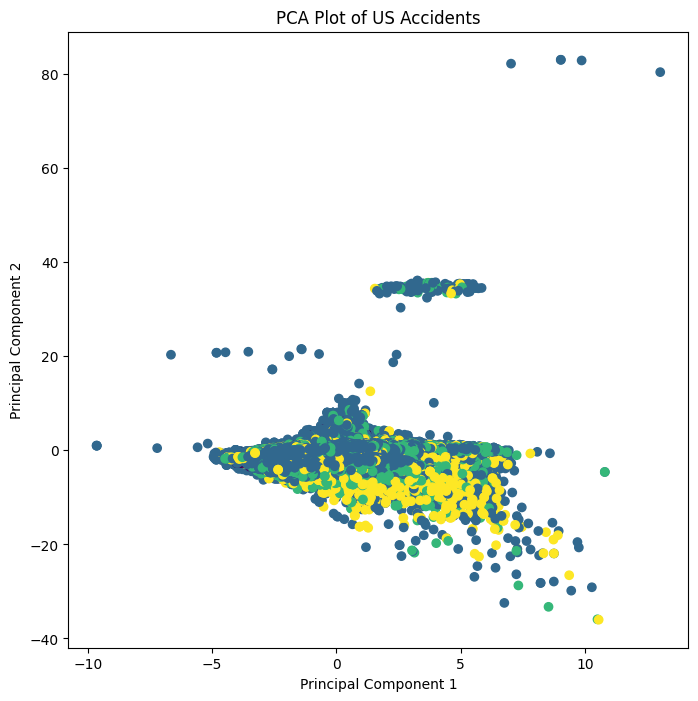

In [14]:
# Step 12: Visualize PCA
plt.figure(figsize=(8, 8))
plt.scatter(df['PCA1'], df['PCA2'], c=df['severity'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of US Accidents')
plt.show()

In [18]:
# Drop non-numerical columns and rows with missing values
df = df.select_dtypes(include=[float, int])
df = df.dropna()
# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df)

In [19]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('severity', axis=1), df['severity'], test_size=0.3, random_state=42)


In [ ]:
# Train the SVM classifier
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)